<center><h2>Isolation Forest</h2>From scratch</center>

#### Libraries

In [1]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pprint import pprint
import seaborn as sns
import pdb
sns.set_style(style="whitegrid")



## Sample data

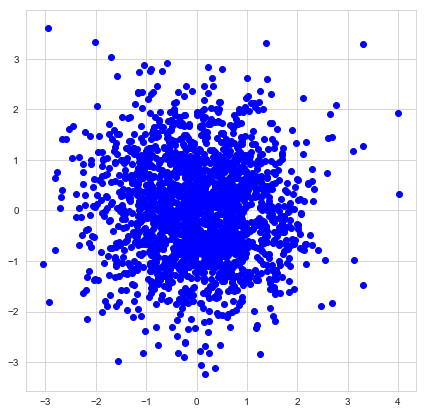

In [3]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 2000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
X = pd.DataFrame(X,columns=['feat1','feat2'])
plt.figure(figsize=(7,7))
plt.plot(x,y,'bo');

## Isolation tree
 1. Get sample of data
 2. Randomly select dimension
 3. Randomly pick a value in the dimension
 4. Split the data


<img src="images/tree_pseudo.png" alt="Drawing" style="width: 400px;"/>

In [32]:
b=4
b<=3

False

### Sample the data

In [4]:
def select_point(data):
    n_samples,n_columns = data.shape
    return data.iloc[random.choice(list(range(n_samples)))]

In [5]:
select_point(X)

feat1    0.147355
feat2   -1.336364
Name: 1625, dtype: float64

### Select a dimension

In [6]:
def select_feature(data): 
    return random.choice(data.columns)

### Select a value in the dimension

In [7]:
def select_value(data,feat):
    mini = data[feat].min()
    maxi = data[feat].max()
    return (maxi-mini)*np.random.random()+mini
    

In [8]:
select_value(X,select_feature(X))

-0.8066062646039218

### Split Data

In [9]:
def split_data(data, split_column, split_value):

    data_below = data[data[split_column] <= split_value]
    data_above = data[data[split_column] >  split_value]
    
    return data_below, data_above

In [10]:
a,b =split_data(X,
           select_feature(X),
          select_value(X,select_feature(X)))

### Isolation Tree

In [24]:
X

,feat1,feat2
0,3.300000,3.300000
1,-0.900872,-0.718895
2,1.290530,0.118936
3,-0.520820,0.458603
4,0.737316,0.449972
...,...,...
1995,-0.530738,0.726033
1996,-0.440658,-0.428466
1997,1.466145,-1.925615
1998,-0.009200,0.437529


In [26]:
def classify_data(data):
    
    label_column = data.values[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [37]:
classify_data(X)

-3.226771811981531

In [62]:
def isolation_tree(df,counter=0, max_depth=50,random_subspace=False):
        # data preparations
    if counter == 0:
        global COLUMN_HEADERS   
        COLUMN_HEADERS = df.columns
        data = df
        
        global counter_hist
        
        global instance
        instance = select_point(data)
   
    else:
        data = df
       

    
    if (counter == max_depth) or data.shape[0]<=1:
        classification = classify_data(data)
        print('class',classification)

        return classification
    
    else:
        # Counter
        counter +=1
        
        # Select feature
        split_column = select_feature(data)
        
        # Select value
        split_value = select_value(data,split_column)
        print(split_value)

        # Split data
        data_below, data_above = split_data(data,split_column,split_value)
        
        
        
        # instantiate sub-tree      
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
         # find answers (recursion)
        yes_answer = isolation_tree(data_below, counter)
        no_answer = isolation_tree(data_above, counter)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
    
    
        
    

In [65]:
tree = isolation_tree(X.head(6), max_depth=3)
pprint(tree)

3.0358848332752735
-0.027488611627374593
-0.578735631544814
class -0.7188946792098038
class 0.458603017600855
1.2272755304376504
1.1432186993045341
class 0.4499721683109122
class 1.954082876296153
class 0.11893590204236246
class 3.3
{'feat1 <= 3.0358848332752735': [{'feat1 <= -0.027488611627374593': [{'feat1 <= -0.578735631544814': [-0.7188946792098038,
                                                                                                      0.458603017600855]},
                                                                     {'feat1 <= 1.2272755304376504': [{'feat2 <= 1.1432186993045341': [0.4499721683109122,
                                                                                                                                       1.954082876296153]},
                                                                                                      0.11893590204236246]}]},
                                 3.3]}


In [66]:
pprint(tree)

{'feat1 <= 3.0358848332752735': [{'feat1 <= -0.027488611627374593': [{'feat1 <= -0.578735631544814': [-0.7188946792098038,
                                                                                                      0.458603017600855]},
                                                                     {'feat1 <= 1.2272755304376504': [{'feat2 <= 1.1432186993045341': [0.4499721683109122,
                                                                                                                                       1.954082876296153]},
                                                                                                      0.11893590204236246]}]},
                                 3.3]}


In [54]:
X.head(2)

,feat1,feat2
0,3.300000,3.300000
1,-0.900872,-0.718895


In [14]:
tree.values()

AttributeError: 'str' object has no attribute 'values'

In [ ]:
counter_hist

In [ ]:
list(tree.keys())[0]

In [ ]:
question = list(tree.keys())[0]
feature_name, comparison_operator, value = question.split()

In [ ]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
        print(answer)
    else:
        answer = tree[question][1]
        print(answer)
    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [ ]:
classify_example(X.iloc[1],tree)

# Forest

 1. For each tree
 2. Sample Data
 3. Fit tree

<img src="images/forest_pseudo.png" alt="Drawing" style="width: 400px;"/>

In [ ]:
def isolation_forest(df,n_trees=5, max_depth=5, subspace=1):
    forest = []

    for i in range(n_trees):
        # Sample the subspace
        df = df.sample(frac=subspace)

        # Fit tree
        tree = isolation_tree(df)
        
        # Save tree to forest
        forest.append(tree)
    
    return forest
        
        

In [ ]:
isolation_forest(X);


## Path Length

<img src="images/path_pseudo.png" alt="Drawing" style="width: 400px;"/>

In [55]:
def c_factor(n) :
    """
    Average path length of unsuccesful search in a binary search tree given n points
    
    Parameters
    ----------
    n : int
        Number of data points for the BST.
    Returns
    -------
    float
        Average path length of unsuccesful search in a BST
        
    """
    return 2.0*(np.log(n-1)+0.5772156649) - (2.0*(n-1.)/(n*1.0))

In [56]:
c_factor(4)

1.8516559071362195